In [10]:
import mne
from mne.datasets import eegbci
from mne.io import *
from mne.viz import *
import matplotlib.pyplot as plt

%matplotlib inline
mne.set_log_level('WARNING')

subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs

fnames = eegbci.load_data(subject, runs)
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in fnames]
raw = concatenate_raws(raws)

raw.rename_channels(lambda x: x.strip('.'))  # remove dots from channel names

print(raw)
print(raw.info)
print(raw.info['ch_names'])

<RawEDF  |  S001R06.edf, n_channels x n_times : 65 x 60000 (375.0 sec), ~29.9 MB, data loaded>
<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 80.0 Hz
    meas_date : int | 1250093700
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 160.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType

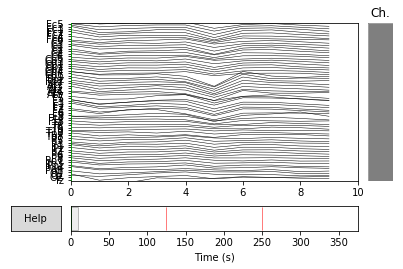

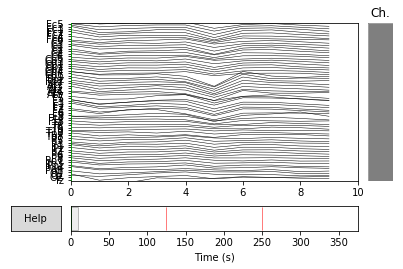

In [11]:
raw2=raw.copy() 
raw2.pick_types(eeg=True,meg=False).resample(sfreq=1).plot(n_channels=64)

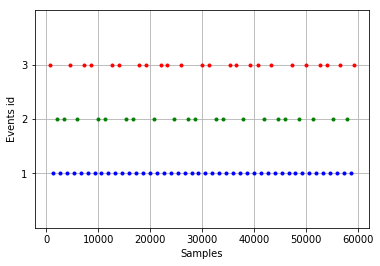

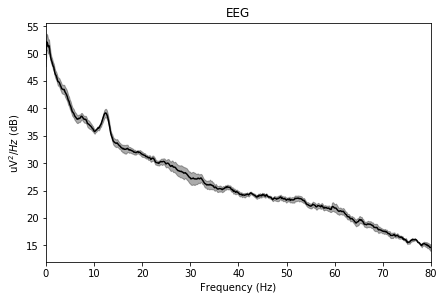

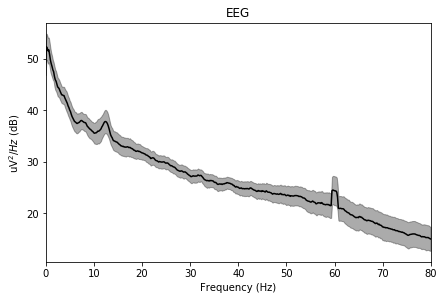

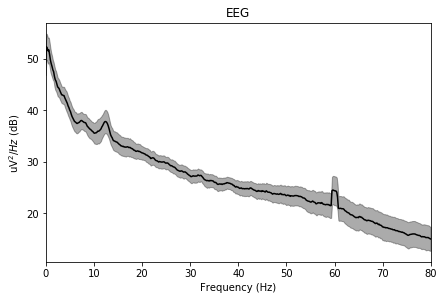

In [23]:
events = mne.find_events(raw, shortest_event=1, stim_channel='STI 014')

picks = mne.pick_channels(raw.info["ch_names"], ["C3", "Cz", "C4"])
# picks = mne.pick_types(raw.info, eeg=True, eog=True, stim=False, exclude='bads')

tmin, tmax = -1, 4  # define epochs around events (in s)
event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=picks, baseline=None, preload=True)
plot_events(events)
epochs.plot_psd()
picks = mne.pick_types(raw.info, eeg=True, eog=True, stim=False, exclude='bads')
epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=picks, baseline=None, preload=True)
epochs.plot_psd()